In [1]:
import os
import math

import numpy as np
import matplotlib.pyplot as plt

classes = list(range(10))
ds = [10, 160]

In [2]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

In [20]:
def plot_error_bars(nup, disparate):
    accuracies = [
        [
            (sum(trial[x]), len(trial[x]))
            if len(trial[x]) > 0
            else None
            for x in classes
        ]
        for _, trial in disparate.items()
    ]
    values = [
        [
            trial[x][0] / trial[x][1]
            for trial in accuracies
            if trial[x]
        ]
        for x in classes
    ]
    weights = [
        [
            trial[x][1]
            for trial in accuracies
            if trial[x]
        ]
        for x in classes
    ]
    
    means = []
    stds = []
    
    for i in classes:
        mean_sgd, std_sgd = weighted_avg_and_std(values[i], weights[i])
        means.append(mean_sgd)
        stds.append(std_sgd)
        
    plt.errorbar(
        classes, 
        means, 
        yerr=stds, 
        fmt='o', 
        markersize=8, 
        capsize=10, 
        label=f"MIA w/ Update Size={nup}"
    )

In [22]:
def plot_all(ds, update_method):
    for nup in ds:
        disparate_sgd = np.load(f"1000_{nup}_{update_method}_LIRA_disparate.npy", allow_pickle=True).item()
        plot_error_bars(nup, disparate_sgd)
        
    plt.xticks(classes)
    plt.ylim(bottom=0.5, top=1)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xlabel("Class", fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

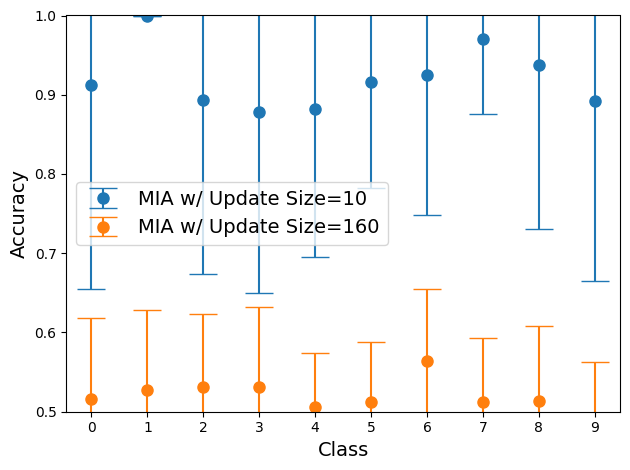

In [23]:
plot_all(ds, "sgd")

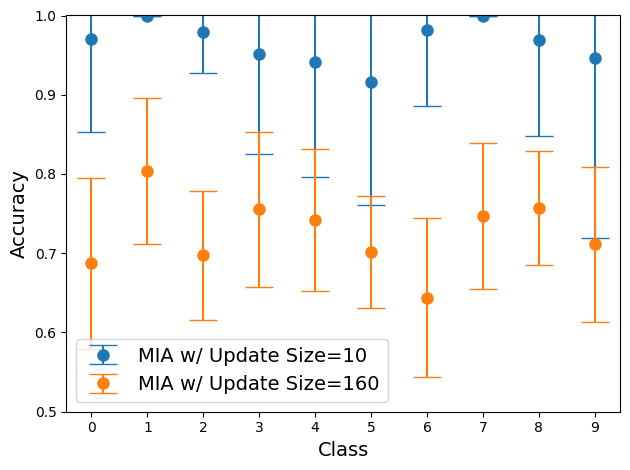

In [24]:
plot_all(ds, "sgd_only")